In [20]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [21]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]  # 多分类任务
X_train, X_test, y_train, y_test = train_test_split(X, y)

enc = OrdinalEncoder()
y_train_new = enc.fit_transform(y_train.reshape(-1, 1))
y_test_new = enc.transform(y_test.reshape(-1, 1))

In [22]:
# Evaluation metrics for validation data, a default metric will be assigned according to objective (rmse for regression, and logloss for classification, mean average precision for ranking)
# eval_metric可选参数
# 可自定义
'''
rmse: 均方根误差
mae: 平均绝对值误差
logloss: 负对数似然函数值
mlogloss: 多分类logloss(多分类)
error: 二分类错误率
merror: 多分类错误率(多分类)
auc
'''
xg1 = XGBClassifier(n_jobs=-1, use_label_encoder=False)
eval_set = [(X_train, y_train_new),
            (X_test, y_test_new)]
xg1.fit(X_train, y_train_new, verbose=5,
        early_stopping_rounds=20,  # mlogloss在20轮迭代之内，都没有提升的话，就stop
        # A list of (X, y) tuple pairs to use as validation sets, for which metrics will be computed. Validation metrics will help us track the performance of the model.
        eval_set=eval_set,
        eval_metric=['mlogloss', 'merror'],  # 多个评估指标
        # eval_metric='mlogloss'  # 单个评估指标
        )

[0]	validation_0-mlogloss:1.34545	validation_0-merror:0.14800	validation_1-mlogloss:1.42596	validation_1-merror:0.26133
[5]	validation_0-mlogloss:0.53891	validation_0-merror:0.10356	validation_1-mlogloss:0.73188	validation_1-merror:0.21733
[10]	validation_0-mlogloss:0.32775	validation_0-merror:0.07333	validation_1-mlogloss:0.57062	validation_1-merror:0.20267
[15]	validation_0-mlogloss:0.23186	validation_0-merror:0.05511	validation_1-mlogloss:0.50801	validation_1-merror:0.19067
[20]	validation_0-mlogloss:0.18214	validation_0-merror:0.03600	validation_1-mlogloss:0.48468	validation_1-merror:0.18933
[25]	validation_0-mlogloss:0.14216	validation_0-merror:0.01689	validation_1-mlogloss:0.47922	validation_1-merror:0.17733
[30]	validation_0-mlogloss:0.11333	validation_0-merror:0.00756	validation_1-mlogloss:0.46401	validation_1-merror:0.17467
[35]	validation_0-mlogloss:0.09468	validation_0-merror:0.00311	validation_1-mlogloss:0.45805	validation_1-merror:0.17333
[40]	validation_0-mlogloss:0.08353

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [23]:
result = xg1.predict(X_test)
result

array([1, 1, 3, 5, 2, 0, 4, 5, 1, 1, 2, 2, 0, 4, 5, 5, 1, 2, 1, 4, 4, 0,
       2, 1, 1, 0, 2, 1, 4, 2, 4, 1, 0, 1, 5, 4, 1, 4, 0, 0, 4, 4, 4, 0,
       4, 3, 1, 6, 0, 0, 1, 1, 4, 0, 0, 3, 0, 4, 0, 5, 1, 3, 2, 4, 4, 5,
       1, 4, 4, 0, 4, 1, 5, 1, 0, 0, 4, 0, 1, 1, 1, 3, 4, 4, 1, 4, 1, 3,
       4, 4, 1, 1, 5, 0, 5, 1, 0, 4, 2, 4, 1, 5, 1, 1, 4, 1, 1, 4, 4, 4,
       4, 4, 1, 4, 5, 5, 5, 4, 4, 0, 1, 1, 1, 0, 4, 4, 4, 0, 1, 4, 4, 4,
       4, 4, 2, 1, 4, 4, 1, 1, 1, 6, 4, 4, 4, 4, 0, 2, 1, 1, 4, 1, 1, 4,
       1, 1, 1, 4, 4, 5, 0, 5, 4, 3, 4, 4, 4, 4, 2, 6, 2, 1, 1, 0, 4, 4,
       1, 6, 0, 1, 3, 1, 4, 1, 5, 3, 4, 4, 1, 2, 1, 1, 5, 1, 1, 4, 1, 4,
       5, 4, 1, 2, 1, 4, 1, 0, 2, 6, 1, 1, 5, 4, 1, 1, 1, 0, 3, 4, 0, 0,
       5, 1, 0, 3, 5, 1, 0, 4, 1, 1, 1, 1, 5, 6, 4, 5, 5, 4, 1, 4, 5, 6,
       0, 1, 2, 6, 0, 4, 0, 4, 4, 4, 1, 0, 1, 0, 3, 4, 1, 4, 1, 5, 2, 1,
       4, 1, 5, 0, 1, 2, 0, 1, 1, 2, 4, 1, 5, 4, 0, 4, 1, 2, 6, 0, 2, 2,
       4, 2, 5, 4, 1, 0, 0, 1, 6, 6, 4, 1, 0, 1, 5,

In [24]:
result.shape

(750,)

In [25]:
# 预测结果可以输出为概率向量
xg1.predict_proba(X_test)  # 仅分类算法

array([[2.5625424e-03, 9.9545848e-01, 9.1176495e-05, ..., 1.5875743e-03,
        1.1486582e-04, 1.0097392e-04],
       [9.5407972e-03, 9.8887491e-01, 8.2109545e-05, ..., 1.2304264e-03,
        1.3969275e-04, 6.8070425e-05],
       [1.2445160e-05, 9.4589241e-06, 3.5833910e-03, ..., 3.4789060e-05,
        2.7833440e-04, 8.6335413e-06],
       ...,
       [3.4591700e-05, 5.2494681e-03, 9.9338770e-01, ..., 3.0088346e-05,
        1.2792267e-03, 8.9815767e-06],
       [1.7144482e-01, 7.9890990e-01, 5.8250047e-05, ..., 2.9332737e-02,
        3.8535938e-05, 1.5103597e-04],
       [7.8708986e-03, 9.9168396e-01, 4.9007056e-05, ..., 6.9551112e-05,
        2.6192291e-05, 2.5822505e-04]], dtype=float32)

In [26]:
xg1.score(X_test, y_test_new)  # 精度

0.8386666666666667

In [ ]:
xg1.feature_importances_  # 特征的相对重要性(值越大,重要程度越高)

In [28]:
evals_result = xg1.evals_result()  # 根据fit函数中eval_set参数与eval_metric参数返回评估结果
evals_result

{'validation_0': OrderedDict([('mlogloss',
               [1.345446,
                1.050153,
                0.859788,
                0.717248,
                0.619048,
                0.538907,
                0.479992,
                0.43279,
                0.393255,
                0.357753,
                0.327748,
                0.303005,
                0.281406,
                0.262819,
                0.246492,
                0.231856,
                0.216945,
                0.207305,
                0.19744,
                0.187912,
                0.182142,
                0.173896,
                0.164203,
                0.155261,
                0.149541,
                0.142155,
                0.136232,
                0.129534,
                0.123304,
                0.117279,
                0.113327,
                0.109999,
                0.105324,
                0.101527,
                0.098357,
                0.094679,
                0.09281

In [29]:
train_evals = evals_result['validation_0']['mlogloss']
test_evals = evals_result['validation_1']['mlogloss']

Text(0.5, 0, 'rounds')

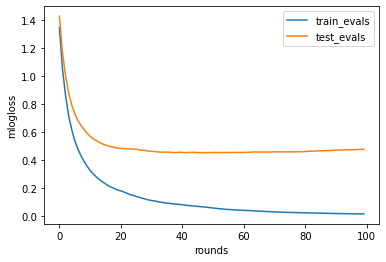

In [30]:
plt.plot(train_evals, label='train_evals')
plt.plot(test_evals, label='test_evals')
plt.legend()
plt.ylabel('mlogloss')
plt.xlabel('rounds')

## XGBRegressor

In [31]:
X = datasets.load_boston().data
y = datasets.load_boston().target
X_train, X_test, y_train_new, y_test_new = train_test_split(X, y)

In [32]:
# Implementation of the scikit-learn API for XGBoost regression.
xg_reg = XGBRegressor(n_jobs=-1)
xg_reg.fit(X_train, y_train_new)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
xg_reg.score(X_test, y_test_new)  # R^2

0.9104628594255071

In [34]:
xg_reg.feature_importances_

array([1.5065513e-02, 3.3434032e-04, 1.7861150e-02, 1.6377289e-02,
       4.7868162e-02, 2.3168732e-01, 8.1094895e-03, 7.7097423e-02,
       2.7418926e-02, 2.6622420e-02, 3.7561711e-02, 7.3154480e-03,
       4.8668078e-01], dtype=float32)

In [35]:
xg_reg.predict(X_test)

array([27.606184 , 12.37367  , 10.3584795, 20.90657  , 12.938    ,
       18.693783 , 23.077253 , 19.635029 , 19.93744  , 46.12157  ,
       22.87939  , 16.641602 , 17.051617 , 23.517685 , 18.05891  ,
       10.75873  , 27.266773 , 29.281944 , 24.17435  , 20.946762 ,
       15.97301  ,  6.579034 , 21.385193 , 19.32667  , 21.409708 ,
        7.1135783, 29.334982 , 20.267788 , 14.546579 , 27.15551  ,
       22.913061 ,  8.408089 , 22.71585  , 16.258953 , 21.395699 ,
        8.4919   , 19.226177 , 25.903898 , 14.313562 , 21.731714 ,
       11.886185 , 22.538507 ,  8.871658 , 13.8896055, 20.56249  ,
       23.766472 , 20.433235 , 18.741352 , 23.341696 , 23.790245 ,
       19.884825 , 18.516314 , 21.699337 , 18.64188  , 18.783077 ,
       51.141624 , 17.827555 , 24.47281  , 15.845278 , 24.138592 ,
       20.269758 , 19.360079 , 19.940342 , 19.340296 , 24.373644 ,
       29.783987 , 36.27211  , 15.149453 , 23.081844 , 13.748452 ,
       33.916183 , 32.599613 , 22.839287 , 25.11365  , 10.0048